Detecting spam alerts in emails and messages is one of the main applications that every big tech company tries to improve for its customers. Apple’s official messaging app and Google’s Gmail are great examples of such applications where spam detection works well to protect users from spam alerts.

Whenever we submit details about our email or contact number on any platform, it has become easy for those platforms to market their products by advertising them by sending emails or by sending messages directly to our contact number. This results in lots of spam alerts and notifications in our inbox. This is where spam detection comes in.

Spam detection means detecting spam messages or emails by understanding text content so that we can only receive notifications about messages or emails that are very important to us. If spam messages are found, they are automatically transferred to a spam folder and we are never notified of such alerts. This helps to improve the user experience, as many spam alerts can bother many users.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv("spam.csv", encoding= 'latin-1')
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


From this dataset, **class and message** are the only features we need to train a machine learning model for spam detection, so let’s select these two columns as the new dataset:

In [3]:
data = data[["class", "message"]]

Now let’s split this dataset into training and test sets and train the model to detect spam messages:

In [4]:
x = np.array(data["message"])
y = np.array(data["class"])
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

Now let’s test this model by taking a user input as a message to detect whether it is spam or not:

In [6]:
sample = input('Enter a message:')
data = cv.transform([sample]).toarray()
clf.predict(data)

Enter a message:Such a mess!


array(['ham'], dtype='<U4')

We’ll be using the **streamlit** library in Python to build an end-to-end application for the machine learning model to detect spam alerts in real-time.

`pip install streamlit`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')
data = data[["class", "message"]]
x = np.array(data["message"])
y = np.array(data["class"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = MultinomialNB()
clf.fit(X_train,y_train)
import streamlit as st
st.title("Spam Detection System")
def spamdetection():
    user = st.text_area("Enter any Message or Email: ")
    if len(user) < 1:
        st.write("  ")
    else:
        sample = user
        data = cv.transform([sample]).toarray()
        a = clf.predict(data)
        st.title(a)
spamdetection()

We cannot run this code the same way we run our other Python programs. As we are using the streamlit library here, so we need to write a command mentioned below in our command prompt or terminal to run this code:

`streamlit run sms.py`

Once this command executes, it will open a link on our default web browser that will display our end-to-end application for spam detection, as shown below.

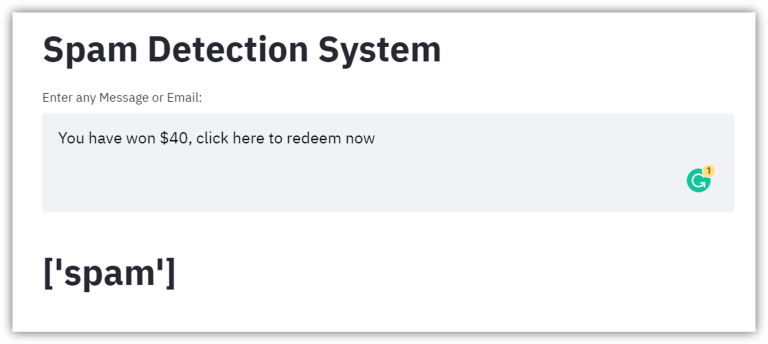